<a href="https://colab.research.google.com/github/Priyanshu-Bist/StockPrediction/blob/main/ANN_Stockpredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'apple-stocks-prediction-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4941161%2F8318913%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240527%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240527T161558Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D274ba56f283e40837be94f25a231b7fce29593ba7813930800dd6978adc0c183998c80d22870830cb9baae05d9c6003a3f564415f8a7d496620c6d1374643b42739674bae2c0d7cb23b2ae0f016b813c6a53b4088a11ea89f6caf1f158617917f8a3ba86a4d4f175f6416a6c2d9560b746e3f58b5c824f003c6e2ebd091c4e49c42b5e6a9625d5fea002f716c90c1a13e45a98b075da4af5f98fc741fa943155426d4886a26e5779123e859eb670300fb0e45ffa35e359f8da862cff7f72b90177bf234fcb12f5097ee401774609bec29541770ca64531f1e5d0f8dda2a6dd9605d1278468be9b11c5f3df079f181045a27b78aa1f010e2b0cdcb36e1320fe11'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 65663 bytes downloaded
Downloaded and uncompressed: apple-stocks-prediction-dataset
Data source import complete.


Epoch 1/50


/tmp/ipykernel_33/3342522457.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0325
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - val_loss: 0.0285
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0112
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5160e-04 - val_loss: 0.0013
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4910e-04 - val_loss: 0.0010
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9527e-04 - val_loss: 7.1955e-04
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9822e-04 - val_loss: 5.8647e-04
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7569e-04 - val_loss: 3.8991e-04
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0424e-04 - val_loss: 3.8219e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3049e-04 - val_loss: 2.7344e-04
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━

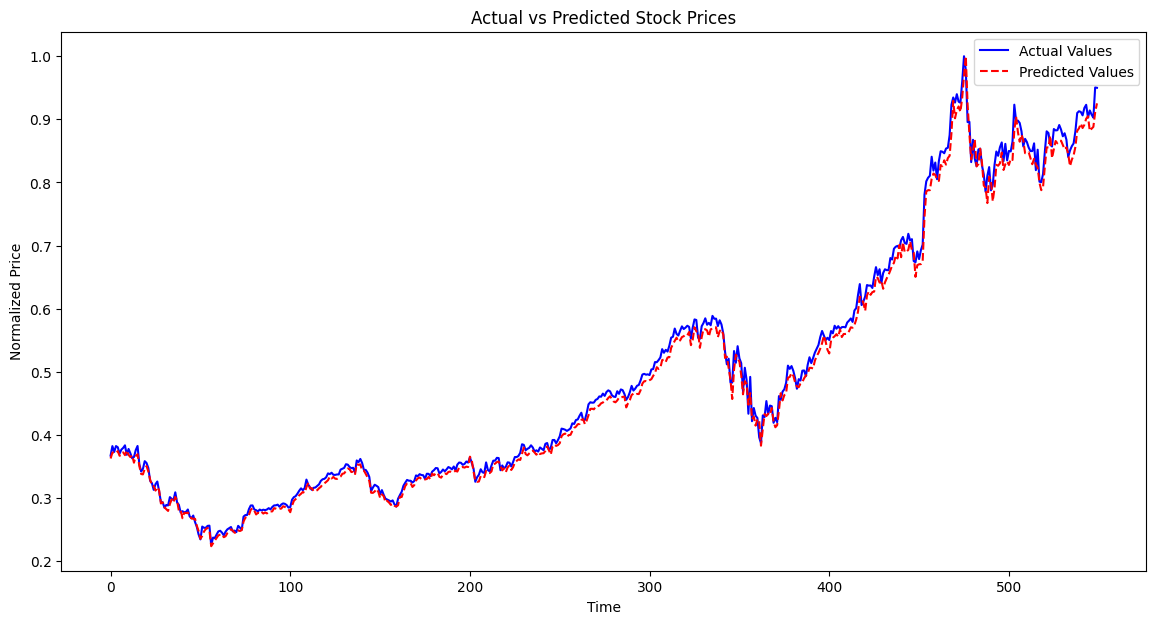

     Actual  Predicted
0  0.367210   0.362587
1  0.382251   0.372012
2  0.372924   0.372153
3  0.382329   0.371123
4  0.380444   0.374351
5  0.370293   0.366914
6  0.376753   0.368502
7  0.379384   0.372323
8  0.383468   0.367941
9  0.368467   0.375370


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import math

# Function to get and preprocess stock data
def get_stock_data():
    url = "/kaggle/input/apple-stocks-prediction-dataset/AAPL.csv"
    stocks = pd.read_csv(url)
    df = pd.DataFrame(stocks)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Volume'] = df['Volume'] / 10000
    return df

# Load and preprocess the data
df = get_stock_data()
df = df[['Open', 'High', 'Close', 'Volume']]

# Normalize the data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# Prepare training and testing data
factor = 0.80
length = len(scaled_df)
total_for_train = int(length * factor)
train_data = scaled_df[:total_for_train]
test_data = scaled_df[total_for_train:]

X_train = train_data[['High', 'Open', 'Volume']]
Y_train = train_data[['Close']]
X_test = test_data[['High', 'Open', 'Volume']]
Y_test = test_data[['Close']]

# Build and train the ANN
classifier = Sequential()
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=3))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
classifier.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.1)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the model
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(Y_test.values, color='blue', label='Actual Values')
plt.plot(predictions, color='red', linestyle='--', label='Predicted Values')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

# Create a DataFrame for actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': Y_test.values.flatten(),
    'Predicted': predictions.flatten()
})

# Display the first few rows
print(comparison_df.head(10))

# Optionally, save the table to a CSV file
comparison_df.to_csv('predicted_vs_actual.csv', index=False)
